# 1. Import the libraries

In [1]:
import AutoProfLib as APL

import numpy as np
import pandas as pd

import os

from mkm import MKM

# 2. Initialize the AutoProfLib

## 2.1 Prepare the input

In [2]:
#Paths: list of strings or string containing the paths or the path to the directory 
#where the regular and the frequency calculations outputs are stored. 
#The program assumes that exists a folder inside the paths provided by the user named
#FREQ or ../Freq (thus, the frequency directories are outside the work_directory and 
#its name is Freq), in which the frequency calculations are stored
path_to_surf_intermediates = ["../tests/Co_0001_iPrOH/Slab",
                             "../tests/Co_0001_iPrOH/H",
                "../tests/Co_0001_iPrOH/CH3CHOHCH3", 
                "../tests/Co_0001_iPrOH/CH3COHCH3",
                   "../tests/Co_0001_iPrOH/CH3CHOCH3",
                   "../tests/Co_0001_iPrOH/CH3COCH3",
                  "../tests/Co_0001_iPrOH/CH3COCH3"]

path_to_gas = ["../tests/Gas_phase/iPrOH", 
                   "../tests/Gas_phase/H2", 
                   "../tests/Gas_phase/CH3COCH3"]
path_to_ts = ["../tests/Co_0001_iPrOH/TS_CH", 
                  "../tests/Co_0001_iPrOH/TS_OH",
                 "../tests/Co_0001_iPrOH/TS_CH_OH", 
                  "../tests/Co_0001_iPrOH/TS_OH_CH"]

In [3]:
#Geometries, frequency treatment, spin, atoms added, PBC instructions 
#and reference instructions.

#list of strings or None string containing the geometry of the molecules or molecule 
#stored in the paths. 
#It is only relevant for gas phase molecules (see Gibbs method).
surf_geometry = None
gas_geometry = ["nonlinear", "linear", "nonlinear"]
#list containing the frequencies process options (see Gibbs and Helmholtz methods
#in the AutoProfLib user guide for further information).
#The elements of the list should be:
#0.	Process option flag: string. The accepted keys are Erase, Substitute 
#(default option) and Grimme.
#1.	Minimum frequency threshold: float indicating the minimum threshold from 
#which the Erase or the Substitute options will be applied.
#2.	Application of the extra Grimme option on the rotational entropy: True to activate
#it, False otherwise. 
#This flag will only make some effect if the first element of max_freq list is Grimme
frequency_pre_process = ["Erase", None, False]
#spin: list of int or int with the spin of the molecule. 
#This variable is only important for gas phase molecules (see Gibbs method in
#the User's guide).
spin = 0

#Define the file type
file_type = "CONTCAR"
#Wrapp-up all the information in a list
surf_phase = [path_to_surf_intermediates, 
                  surf_geometry, frequency_pre_process, spin, file_type]
gas_phase = [path_to_gas, gas_geometry, frequency_pre_process, spin, file_type]

TSS = [path_to_ts, surf_geometry, frequency_pre_process, spin, file_type]
#add_atom: list of lists containing the information to add an atom to specific 
#coordinates. This utility is used to avoid problems related to mass conservation, 
#which affects to the mechanism.
#The items of the list are:
#0.	List containing two items list (int) for each atom added. 
#The first item of the list indicates the phase in which the atom will be added 
#(0: adsorbed intermediates, 1: gas phase, and 2: TSs). 
#The second item indicates the index of the specie or state in which the new atom 
#will be added.
#1.	List containing four items list for each atom to be added. 
#The first element is the label of the atom (string), and the other 3 are the 
#corresponding x, y, and z coordinates of the atom.

add_atom =  [   [[0,1], [0,3], [0,4], [0,5], [0,5], [2, 2], [2, 3] ],  
                 [ ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                  ["H",5.598002346788653,5.2364688867555407,12.62224206687647] ,
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",12.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",12.598002346788653,5.2364688867555407,12.62224206687647] ] ]
#use_pbc: list that sets the control to use the PBC in the PreProcessor class. 
#The items of the use_pbc list are:
#0.	A bool. If is set as True, the PBC are applied.
#1.	This item indicates to the program the structures in which the PBC will not 
#be applied. A list of lists (like the first item in add_atom input), 
#where each element is a list (int) containing two items. 
#The usage and the interpretation are the same than in the first element of the 
#add_atom input.
use_pbc = [True, [[0, 5], [0, 6], [2,0],[2,1], [2,2]]]
#reference: list containing the flags to reference the energy profile according to the user indications. The reference items are:
#0.	The label of the surface state.
#1.	The total number of surfaces that will be used.
#2.	The gas phase reactive label.
#3.	The gas phase product label.
#4.	The supplementary adsorbed surface and gas phase list. 
#This list is used if an adsorbed intermediate (for instance, H*) is taken 
#into account in the reference. The first item is a bool, True if this list 
#should have effect (False otherwise), the second one is the label of the adsorbed 
#specie that will be taken into account in the reference, the third one is a bool 
#that indicates if this specie is a reactant (e.g in a hydrogenation example; then, 
#this item should be True) or a product (e.g in a dehydrogenation example; then, 
#this item should be False), and the fourth one is the label of the 
#gas phase specie (e.g H2(g)).

ref = ["Co", 3, "CH3CHOHCH3(g)", 'CH3COCH3(g)', [True, "2H", False, 1, "H2(g)"]]


In [4]:
#Class initialization. T_P are the initial Temperature and Pressure conditions
ADA = APL.AutoProfLib(surf_phase, gas_phase, TSS,add_atom, use_pbc,ref,T_P 
                      = [418, 1.0]) 

The estimated max_pbc is 0.68. Does it corresponds to your needs? Y/N: y


# 3. Generate the mechanism

/home/asabadell/newamuse/amuse/tutorial/tutorial/AutoProfLib.py:1940: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  max_connectivity = int(keys["Valence"])
/home/asabadell/newamuse/amuse/tutorial/tutorial/AutoProfLib.py:1941: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_radius = float(keys["Max_dist"])


{'Empty': 1, 'C': '', 'O': '', 'H': '', 'Label': 'Co'}
{'Empty': '', 'C': '', 'O': '', 'H': [2, 2], 'Label': '2H'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 'H', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 0, 8], 'Label': 'CH3CHOHCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 'H', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'O', 1, 8], 'Label': 'CH3COHCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 1, 8], 'Label': 'CH3CHOCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 2, 8], 'Label': 'CH3COCH3_2H'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 0, 6], 'Label': 'CH3COCH3'}
{'Empty': '', 'C':

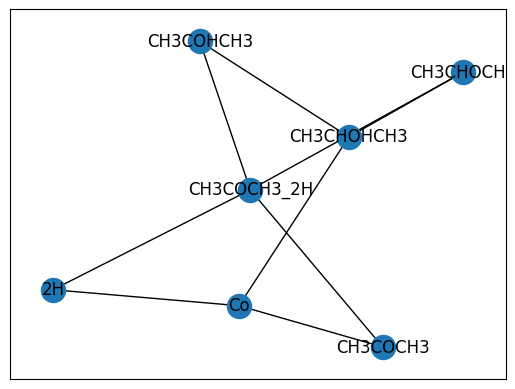

In [5]:
#Labels for the mechanism and the stoichiometric matrix
Labels =["Co", "2H", "CH3CHOHCH3", "CH3COHCH3", "CH3CHOCH3", "CH3COCH3_2H", 
        "CH3COCH3"]
gas_Labels = ["CH3CHOHCH3(g)", "H2(g)", "CH3COCH3(g)"]

TS_Labels = ["CH", "OH", "CH-OH", "OH-CH"]


#Print the obtained connectivity dictionaries
Labeled_dicts = ADA.get_labeled_dicts(Labels)
for i in Labeled_dicts:
    print(i)
for j in ADA.gas_conn_dicts:
    print(j)
for k in ADA.TSs_conn_dicts:
    print(k)

#Generate the system adjacency matrix
m = ADA.system_adjacency_matrix()
#Generate the mechanism graph using the system adjacency matrix and the 
gr = ADA.make_mol_graphs(m, Labels)
#Draw the mechanism as a graph
ADA.show_graph_with_labels(m, Labels, "./ADA_graph.png")

# 4. Generate the stoichiometric matrix

In [6]:
#Generate the stoichiometric matrix generates the stoichiometric matrix 
#(as a pandas Data Frame) and the following files: the rm.mkm, 
#the human_readeable_reactions.txt and the Stoich_mat.csv

#The user should provide the gas phase molecules, and the TS Labels, together
#with a list containing the labels of the graph nodes (intermediates) to generate
#the graph analysis. That is: find the different branches of the mechanism that leads
#from the first node ("Pd" in this case) to the last intemediate ("CH3COCH3 in this
#case")
stoich_mat = ADA.get_stoich_mat(Labels, gas_Labels, TS_Labels, [Labels[0], Labels[-1]], 4)

In [7]:
stoich_mat

,R1,R2,R3,R4,R5,R6,R7,R8,R9
i0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
i1,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
i2,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
i3,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0
i4,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
i5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0
i6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
CH3CHOHCH3(g),0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H2(g),-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CH3COCH3(g),0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0


# 5. Generate the energetic pathway

Frequency list saved on ../tests/Co_0001_iPrOH/Slab/Freq/freq.txt
Energy summary at T = 418.00 K
Potential energy: -248.94770045 eV
ZPE correction: 0.6622325335000001 eV
Total Cv: 1.3648745797324187 eV/K
U: -246.92059333676758 eV
S: 0.006903680714148645 eV/K
F: -249.80633187528173 eV
Energy summary saved at ../tests/Co_0001_iPrOH/Slab/Freq/energy_summary_None.txt
Frequency list saved on ../tests/Co_0001_iPrOH/H/Freq/freq.txt
Energy summary at T = 418.00 K
Potential energy: -252.88050363 eV
ZPE correction: 0.8495343675000001 eV
Total Cv: 1.3726422435281795 eV/K
U: -250.6583270189718 eV
S: 0.006848503576165825 eV/K
F: -253.5210015138091 eV
Energy summary saved at ../tests/Co_0001_iPrOH/H/Freq/energy_summary_None.txt
Frequency list saved on ../tests/Co_0001_iPrOH/CH3CHOHCH3/Freq/freq.txt
Energy summary at T = 418.00 K
Potential energy: -313.37590867 eV
ZPE correction: 3.5368572134999994 eV
Total Cv: 1.7030891220143198 eV/K
U: -308.13596233448567 eV
S: 0.008673697630635848 eV/K
F: -311.761

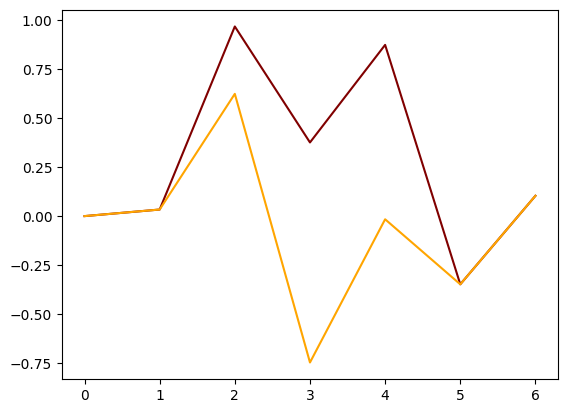

In [8]:
#Generate the energy profile and gather the energies of the gas phase, the surface,
#and the TS, and wrap all the energy information in the energy_dict free (Gibbs for
#gas phase, Helmholtz for adsorbed species), the energy_dict_h (Enthalpy for gas,
#internal energy for adsorbed intermediates) and energy_dict_s (entropies). Finally,
#the energy paths found by the programm are also returned (paths_energy).

#The energy is saved in the Output_energy and Output_energy_ref (automatic) files.
Output_energy = "g.mkm"
Res = ADA.export_energies(Output_energy)
gas,surface,tss,energy_dict_free,energy_dict_h,energy_dict_s,paths_energy = Res

In [9]:
#Generate the input for generating the OpenFOAM Mechanism
Path_to_human_readeable_reactions = "Human_readable_reactions.txt"
ADA.OpenFOAM_mechanism(Path_to_human_readeable_reactions)

[['Co', '+', 'H2(g)', '->', '2H'],
 ['Co', '+', 'CH3CHOHCH3(g)', '->', 'CH3CHOHCH3'],
 ['CH3CHOHCH3 + Co', '->', 'CH3COHCH3 + 1H'],
 ['CH3CHOHCH3 + Co', '->', 'CH3CHOCH3 + 1H'],
 ['2H', '+', 'CH3COCH3(g)', '->', 'CH3COCH3_2H'],
 ['CH3COHCH3 + Co', '->', 'CH3COCH3_2H + 1H'],
 ['CH3CHOCH3 + Co', '->', 'CH3COCH3_2H + 1H'],
 ['CH3COCH3', '->', 'Co', '+', 'CH3COCH3(g)'],
 ['CH3COCH3_2H', '->', 'CH3COCH3', '+', 'H2(g)']]

# 6. Initialize pyMKM

In [10]:
# Set the the label of the reaction on interest
# and its position in the mechanism in the first line (starting by 0)
# of the mechanism file rm.mkm (in this case we reccomend ADA 7:)

with open("rm.mkm", "r") as inf:
    lines = [line for line in inf]
inf.close()

new_line = lines[0][lines[0].index(":"):]

label = "ADA"

number = 7

new_line = label + " " + str(number) + new_line

with open("rm.mkm", "w") as outf:
    outf.write(new_line)
    for line in lines[1:]:
        outf.write(line)
outf.close()

# The arguments for initialization are the following:
# 1. Label for the kinetic simulation 
# 2. Path to the mechanism file rm.mkm
# 3. Path to the energy file, in this case g_ref.mkm
# 4. Temperature of reference, t_ref. In this case, 418 K
# to mimic the experimental conditions

model = MKM('ADA', './rm.mkm', './g_ref.mkm', t_ref=418)

## 6.1 Extract the barriers

In [11]:
# Extract the barriers for generate the OpenFoam mechanism
# afterwards 

data = model.df_gibbs

# Add the prefactor for the reactions
data["Prefactor"] = [1e13 for _ in range(len(data))]

data.drop("DGR / eV", axis = 1)

lst = data.columns.to_list()[-1:] + data.columns.to_list()[:-1]

data = data[lst]

data.to_csv("Barriers.csv")

# 7. Perform the kinetick run

In [12]:
# Run the simulation for a Differential PFR reactor

# The arguments for the simulations are the following:
# 1. Temperature in K
# 2. Pressure in Pa
# 3. List or array with the gas feed composition.
# The numbers correspond to the molar fraction of each gas species 
# in the mechanism by order of appearance, and the length of the list 
# should be equals to the number of gas species present in the system.

# In the example, it is shown a case in which the only species present in
# the reactor at the beggining is CH3CHOHCH3 (iso-propanol)
 

exp2 = model.kinetic_run(418, 1e5, [0,1.0,0])

ADA: Microkinetic run
Reactor model: Differential PFR
Temperature = 418K    Pressure = 1.0bar
Gas composition: H2=0.0%  CH3CHOHCH3=100.0%  CH3COCH3=0.0%  

ADA Reaction Rate: 2.29e+02 1/s
ADA Selectivity: 100.00%
Most Abundant Surface Intermediate (MASI): i1 Coverage: 52.12% 
CPU time: 1.45 s


In [13]:
exp2

{'T': 418,
 'P': 1.0,
 'y_in': {'H2(g)': 0, 'CH3CHOHCH3(g)': 1.0, 'CH3COCH3(g)': 0},
 'y_out': {'H2(g)': 0.0, 'CH3CHOHCH3(g)': 1.0, 'CH3COCH3(g)': 0.0},
 'theta': {'i0': 3.5015841041731018e-06,
  'i1': 0.5211582690723842,
  'i2': 0.0003381054513902982,
  'i3': 1.7508704240155598e-09,
  'i4': 0.4784928814722462,
  'i5': 7.2406428537681345e-06,
  'i6': 2.6256218845113752e-11},
 'ddt': {'i0': 0.0,
  'i1': 4.7055860943889805e-11,
  'i2': -1.1368683772161603e-13,
  'i3': 1.734723475976807e-18,
  'i4': -4.686739885073621e-11,
  'i5': -1.1368683772161603e-13,
  'i6': 2.842170943040401e-14,
  'H2(g)': 0.0,
  'CH3CHOHCH3(g)': 0.0,
  'CH3COCH3(g)': 0.0},
 'r': {'R1': -0.012245502559820681,
  'R2': 228.6927481318297,
  'R3': 0.015369193015887109,
  'R4': 228.67737893881392,
  'R5': -0.012245502606876542,
  'R6': 0.015369193015887107,
  'R7': 228.67737893886078,
  'R8': 228.68050262926988,
  'R9': 228.6805026292699},
 'r_ADA': 228.68050262926988,
 'conversion': {'CH3CHOHCH3(g)': 0},
 'S_ADA': 1.0,

# 8. Estimate the apparent activation energy

ADA: Apparent activation energy for ADA reaction

Temperature range: 220-470K    Pressure = 1.0bar
Gas composition: H2=0.0%  CH3CHOHCH3=100.0%  CH3COCH3=0.0%  

Temperature = 220K    CPU Time: 1.55s
Temperature = 270K    CPU Time: 1.40s
Temperature = 320K    CPU Time: 1.33s
Temperature = 370K    CPU Time: 1.42s
Temperature = 420K    CPU Time: 1.39s
Temperature = 470K    CPU Time: 1.32s


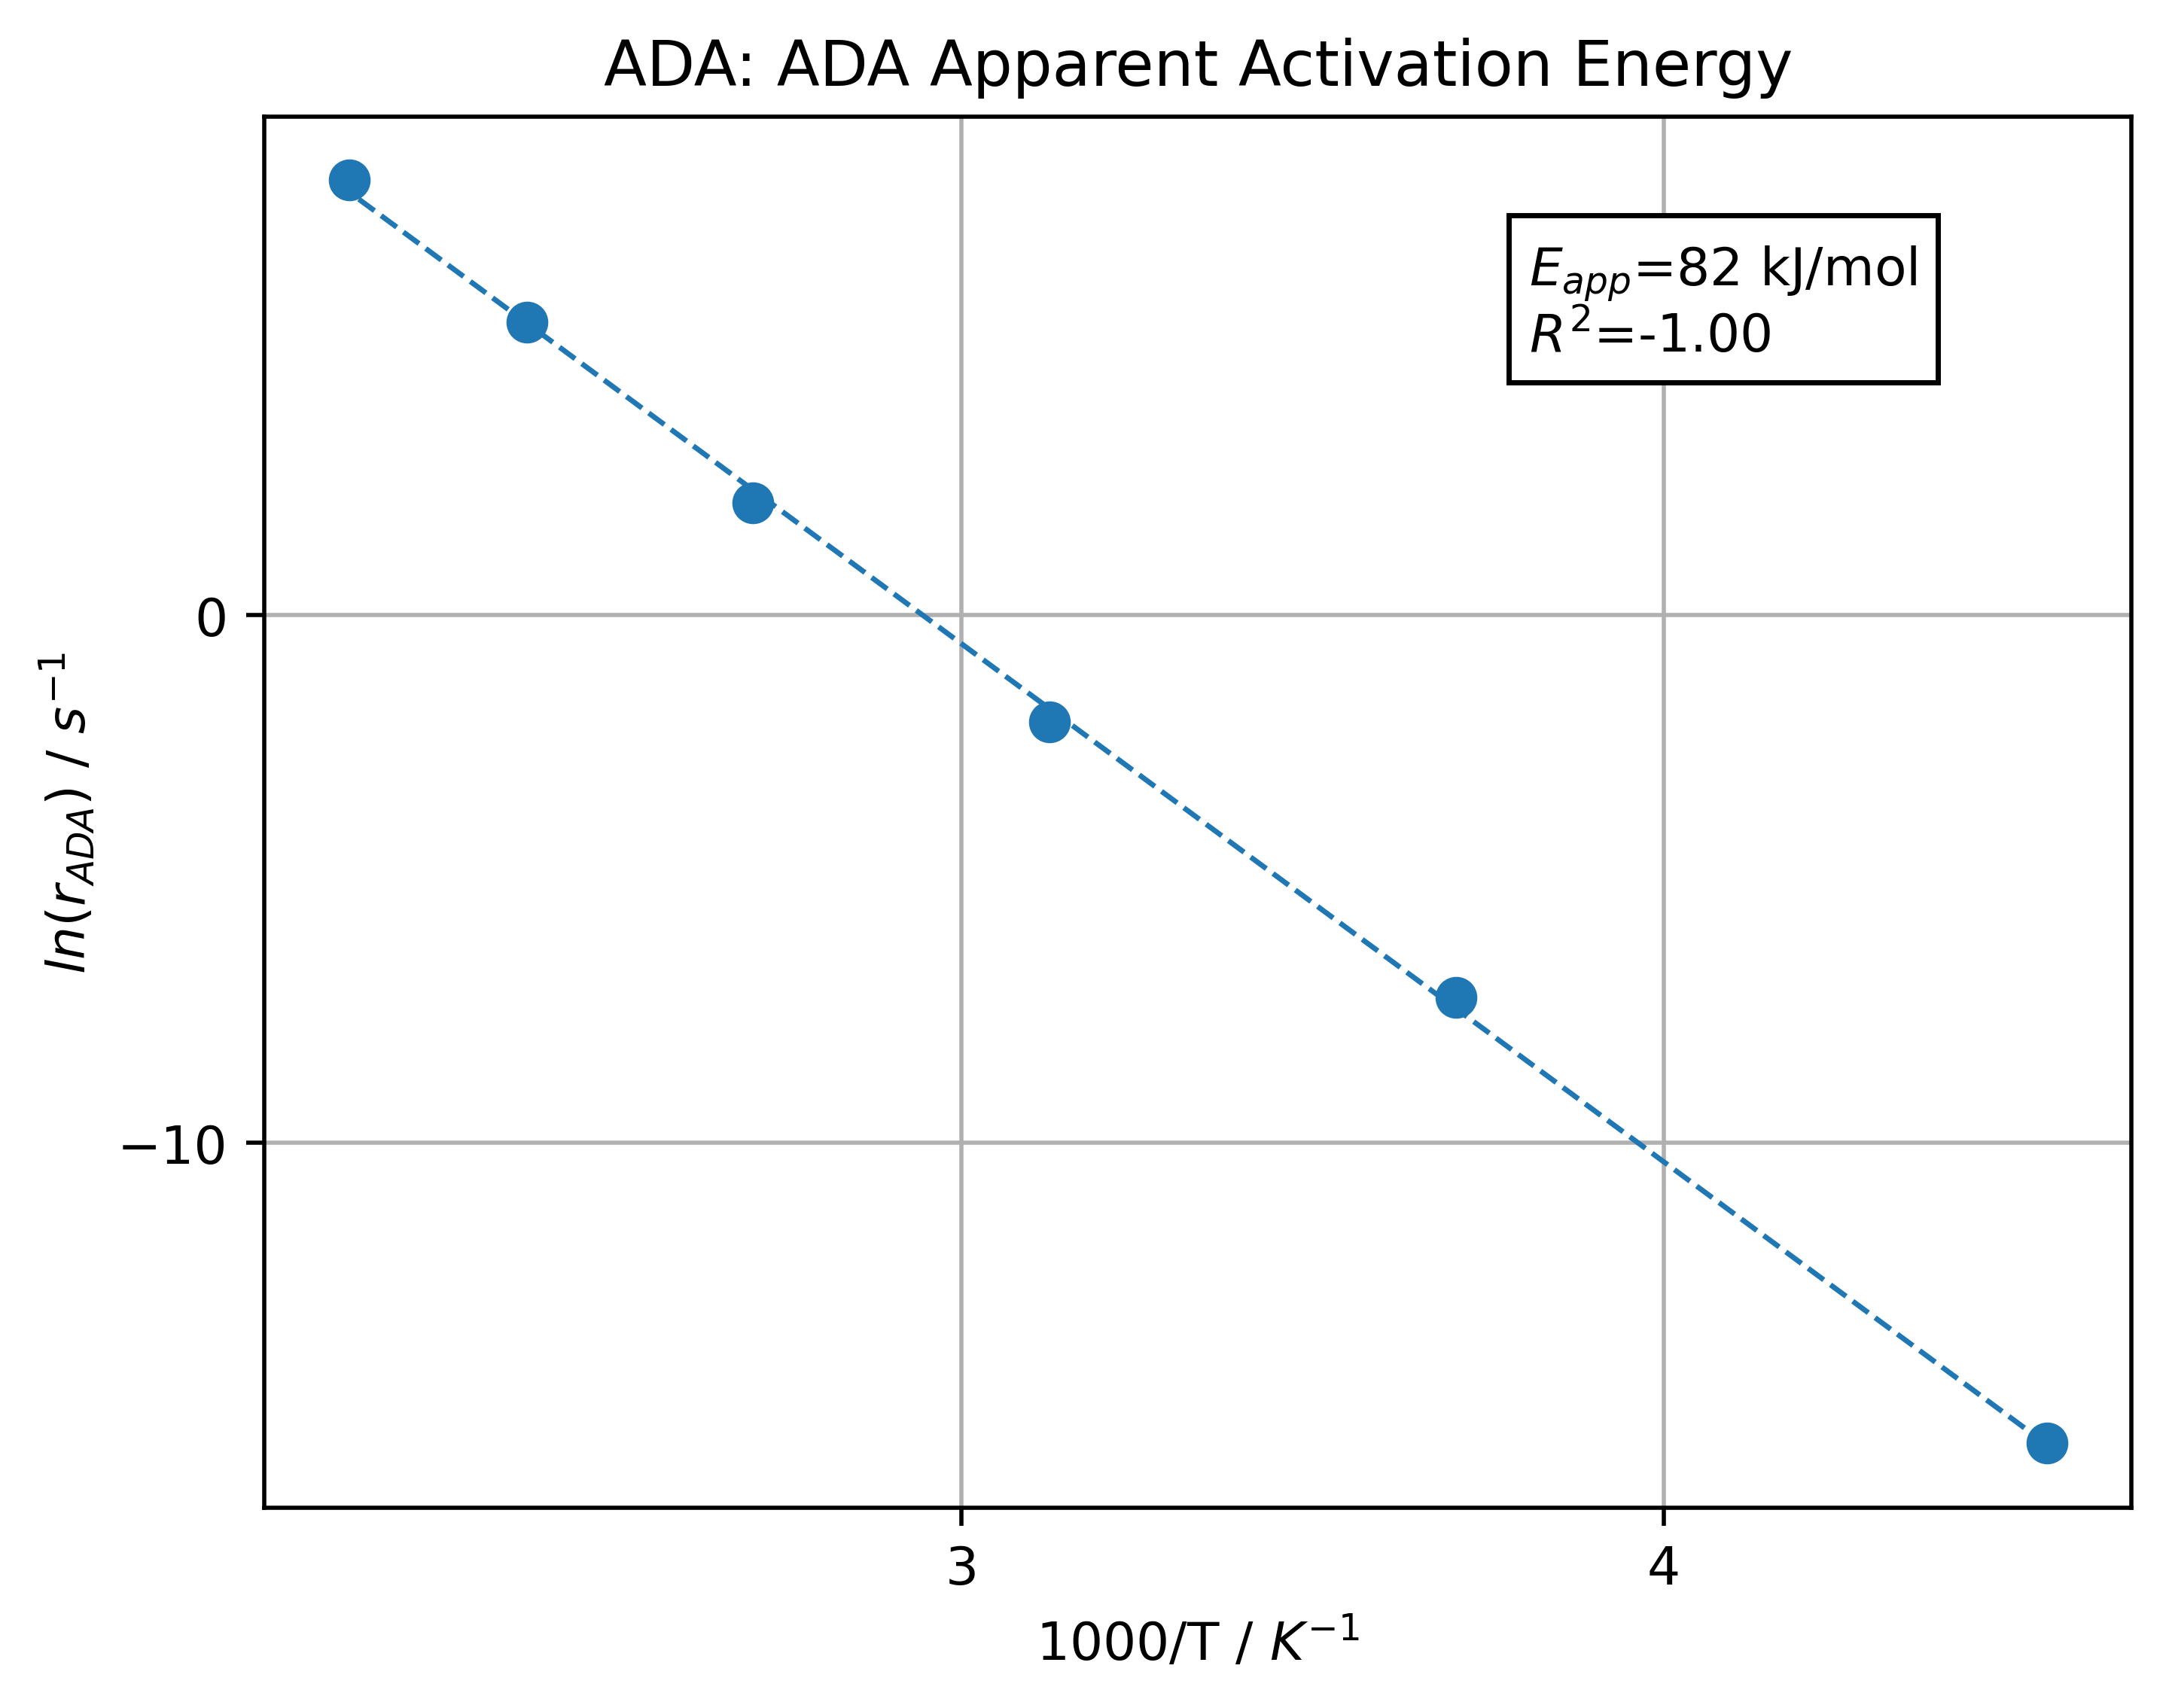

In [18]:
# Estimate the apparent activation energy.

# The arguments are:
# 1. List containing the initial and final temperatures of the 
# simulation, and the sepparation between observations. 
# In the example, we will generate a temperature range of 6 points 
# from 220 K to 520 K (50 K of sepparation between points)
# 2. Pressure in bars
# 3. Initial gas omposition
# 4. Label of the reaction to be studied (corresponding to the label
# set by the user in the first line of rm.mkm file)

Eapp = model.apparent_activation_energy([220,520,50], 1e5, [0,1.0,0], 'ADA')


# 9. Generate the kinetick files for the CFD simulation

In [15]:
# Execute the Auto_MKM_toOF.py script to generate the Surface.sur file
# which is the mechanism input for CatalyticFoam.

# IMPORTANT NOTE: The transport, the physico-chemical properties, the Kinetic.kin file and the 
# setting of the initial conditions and  (0 and system folders) are not yet automated.
# Thus, modify what is required for each case. 

# IMPORTANT NOTE 2: The provided mesh is an hypersimplified case, representing a 1 D reactor
# with the catalyst in the walls.

# IMPORTANT NOTE 3: To run the CFD case, CatalyticFoam should be installed. This
# might require a license.

execution = "python Auto_MKM_toOF.py"

#Set the path to the ./PreOpenFoam_readable_reactions.txt 
Path_to_PreOpenFoam = " --Path_to_PreOpenFoam ./PreOpenFoam_readable_reactions.txt"

#Set the path to the Barriers.csv file 
Path_to_Barriers = " --Path_to_Barriers ./Barriers.csv "

#Set the path to the output
Path_to_Output = " --Path_to_Output ./CatalyticFoam_Case/kinetic/Surface.sur"

order = execution + Path_to_PreOpenFoam + Path_to_Barriers + Path_to_Output

os.system(order)

0

# 10. Run the Chemkin preprocessor script

In [16]:
# Prepare the kinetic input for the CatalyticFoam simulation

os.system("cd CatalyticFoam_Case/kinetic/ && catalyticFoam_CHEMKINPreProcessor")

-----------------------------------------------------------------------------

          ___                   ____  __  __  ___  _  _______                 
         / _ \ _ __   ___ _ __ / ___||  \/  |/ _ \| |/ / ____| _     _        
        | | | | '_ \ / _ \ '_ \\___ \| |\/| | | | | ' /|  _| _| |_ _| |_      
        | |_| | |_) |  __/ | | |___) | |  | | |_| | . \| |__|_   _|_   _|     
         \___/| .__/ \___|_| |_|____/|_|  |_|\___/|_|\_\_____||_|   |_|       
              |_|                                                             


           Department of Chemistry, Materials and Chemical Engineering        
                              Politecnico di Milano                           
                         http://www.opensmoke.polimi.it/                      
                      http://creckmodeling.chem.polimi.it/                    

                        OpenSMOKE_CHEMKIN_PreProcessor
                                Version: 0.7.0
                Author: Al

0

# 11. Run the CFD simulation

In [ ]:
# Run the CFD simulation. This might take some time
    
os.system("cd CatalyticFoam_Case && catalyticPimpleFOAM > log.log")
    